In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

In [2]:
CC_df = pd.read_csv('../Archive/Phase_4__2MASS_UpperLim_Classification/Scripts/CC_Webb_Predictions_Prob_Dec192022.csv')

CC_val = CC_df[~CC_df['SPICY_Class_0/1'].isna()][['Class','SPICY_Class_0/1','Prob YSO']]

tars = CC_val['SPICY_Class_0/1'].values
preds = CC_val['Class'].values
probs = CC_val['Prob YSO'].values

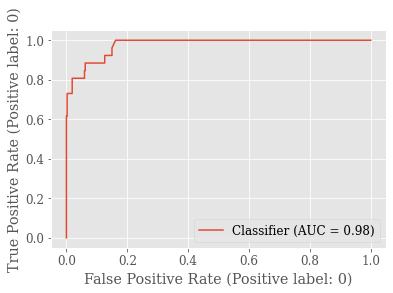

In [3]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(tars,probs,pos_label=0)
plt.savefig('ROC_Curve_Dec192022.png',dpi=300)

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay


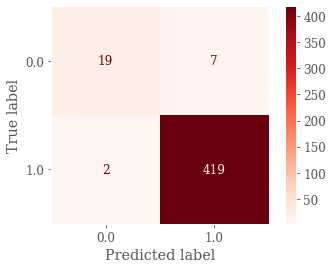

In [5]:

ConfusionMatrixDisplay.from_predictions(tars,preds,cmap='Reds')
plt.grid(False)
# plt.savefig('CM_Dec192022.png',dpi=300)
plt.show()

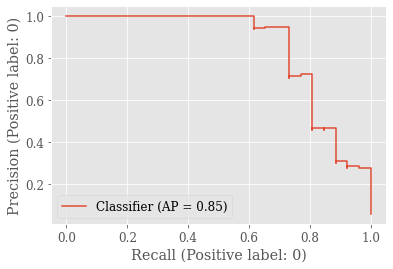

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(tars,probs,pos_label=0)
plt.savefig('PRCurve_Dec192022.png',dpi=300)